### CE88: Data Science for Smart Cities - 10/30/17

# *Hidden Markov models*


Two students have gotten into an argument over the weather. One thinks
summer is over and Autumn has already come, while the other thinks it is still summer.

There are four seasons - Spring (S), Summer (M), Autumn (A), and Winter (W). 
Given the season the previous day, the season on a day is conditionally independent
of the season on all previous days. The weather is either Hot (H), Rainy (R) or Freezing
(F). Given the season on any given day, the weather that day is independent of all other
variables.


More formally, if we let $C_i$ denote the season on the $i$-th day (taking values S, M, A, W) and
$O_i$ denote the observed weather pattern (one of H, R, F). We have $\forall j < i-1, C_i \perp C_j \mid C_{i-1}$
and $\forall X, O_i \perp X \mid C_i$ where $X$ is any random variable other than $C_i$, $O_i$.


**Part 2. (40 points)** We have made 20 observation of the weather over the last few months (i.e.,
$O_1,...,O_{20}$): $\{R,F,F,H,F,H,H,H,H,H,H,H,H,R,H,H,H,R,H,H\}$.


The prior, transition and emission matrices are given as below:

$p(C_0)$

<img src="prior.png", width="300">

$p(C_{t+1} \mid C_t)$

<img src="transition.png", width="300">

$p(O_t \mid C_t)$

<img src="emission.png", width="300">


- Compute the probability of (S, M, A, W) for each of first 15 observations (e.g., $\forall t, p(C_t = M \mid O_1,...,O_{15}))$. The answer should be $(4 \times 15)$ probability matrix. Plot probabilities of all states for 15 steps on the same figure with different colors (your x-axis would be time steps, y-axis probability of each states).


- Determine the most likely sequence of states, $C_1,...,C_N$ that generated this observed sequence.


- What is the probability of the observed sequence, given the model parameters, i.e. $ p(O_1,O_2,...,O_{15} \mid T,E,P_0)$?


- What is the probability of the observed sequence and most probable hidden states, given the model parameters, i.e. $ p((O_1,O_2,...,O_{15}), (C_1,C_2,...,C_{15}) \mid T,E,P_0)$?


- Now, let's see how well this model performs. Predict the output symbols (observations) for time
points $t = 16,...,20$ by carrying out the following steps for each time point $t$:


    - Run the forward algorithm to estimate $p(C_{t} \mid O_{1},...,O_{t-1})$. 

    - Compute $p(C_t)$ from $p(C_{t-1})$ using the transition matrix. Generate the output value $O_t$ by sampling a state $c_t$ from $p(C_t)$ and then from $p(O_t mid C_t = c_t)$.

    -Compare your predictions with the ground truth observations at time points $t = 15,...,20$. What's the percentage of these values that your model predicts correctly?

In [3]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import hmms
%matplotlib inline


### Let's first create the models and do some fun with HMMs

In [4]:
# prior
Pi = np.array([0.15,0.6,0.2,0.05])

# transition probabilities
Trans = np.array([[0.8,0.17,0.02,0.01],[0.1,0.7,0.19,0.01],[0.02,0.05,0.7,0.23],[0.2,0.01,0.04,0.75]])

#Emission probabilities
Emiss = np.array([[0.4,0.3,0.3],[0.5,0.45,0.05],[0.3,0.4,0.3],[0.0001,0.2499,0.75]])

# Observation sequence that is given to us
Obs_seq = np.array([1,2,2,0,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0])


In [5]:
# Create DtHMM by given parameters.
dhmm = hmms.DtHMM(Trans,Emiss,Pi)

You can get parameters by calling them separately,


In [6]:
dhmm.a, dhmm.b, dhmm.pi

(array([[ 0.8 ,  0.17,  0.02,  0.01],
        [ 0.1 ,  0.7 ,  0.19,  0.01],
        [ 0.02,  0.05,  0.7 ,  0.23],
        [ 0.2 ,  0.01,  0.04,  0.75]]),
 array([[  4.00000000e-01,   3.00000000e-01,   3.00000000e-01],
        [  5.00000000e-01,   4.50000000e-01,   5.00000000e-02],
        [  3.00000000e-01,   4.00000000e-01,   3.00000000e-01],
        [  1.00000000e-04,   2.49900000e-01,   7.50000000e-01]]),
 array([ 0.15,  0.6 ,  0.2 ,  0.05]))

### Generate Random State and Emission Sequence

Now we can use our model to generate state and emission sequence.

The model will randomly choose which transition or emission will happen, taking into consideration the parameters we have previously defined.

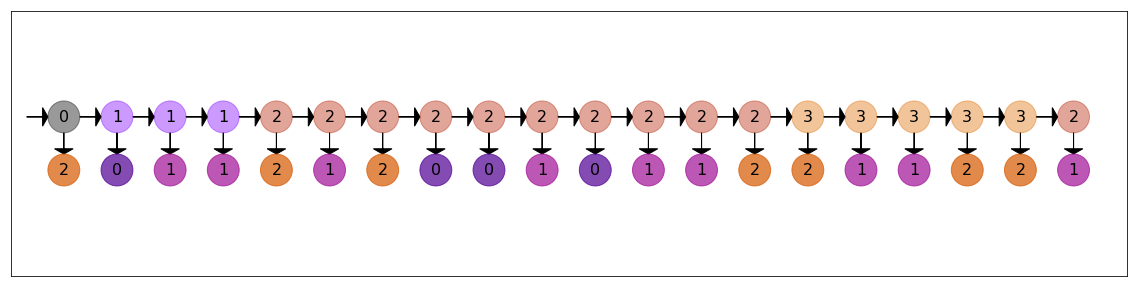

In [7]:
seq_len = 20
s_seq, e_seq = dhmm.generate( seq_len )

#resize plot
plt.rcParams['figure.figsize'] = [20,20]

hmms.plot_hmm( s_seq, e_seq )


**Part 1.** Compute the probability of (S, M, A, W) for each of first 15 observations (e.g., $\forall t, p(C_t = M \mid O_1,...,O_{15}))$. The answer should be $(4 \times 15)$ probability matrix. Plot probabilities of all states for 15 steps on the same figure with different colors (your x-axis would be time steps, y-axis probability of each states).



In [8]:
log_prob_table = dhmm.states_confidence( Obs_seq[0:14] )
p_state = np.exp(log_prob_table)


Now we visualize these probabilities of state throughout time steps 1 to 15

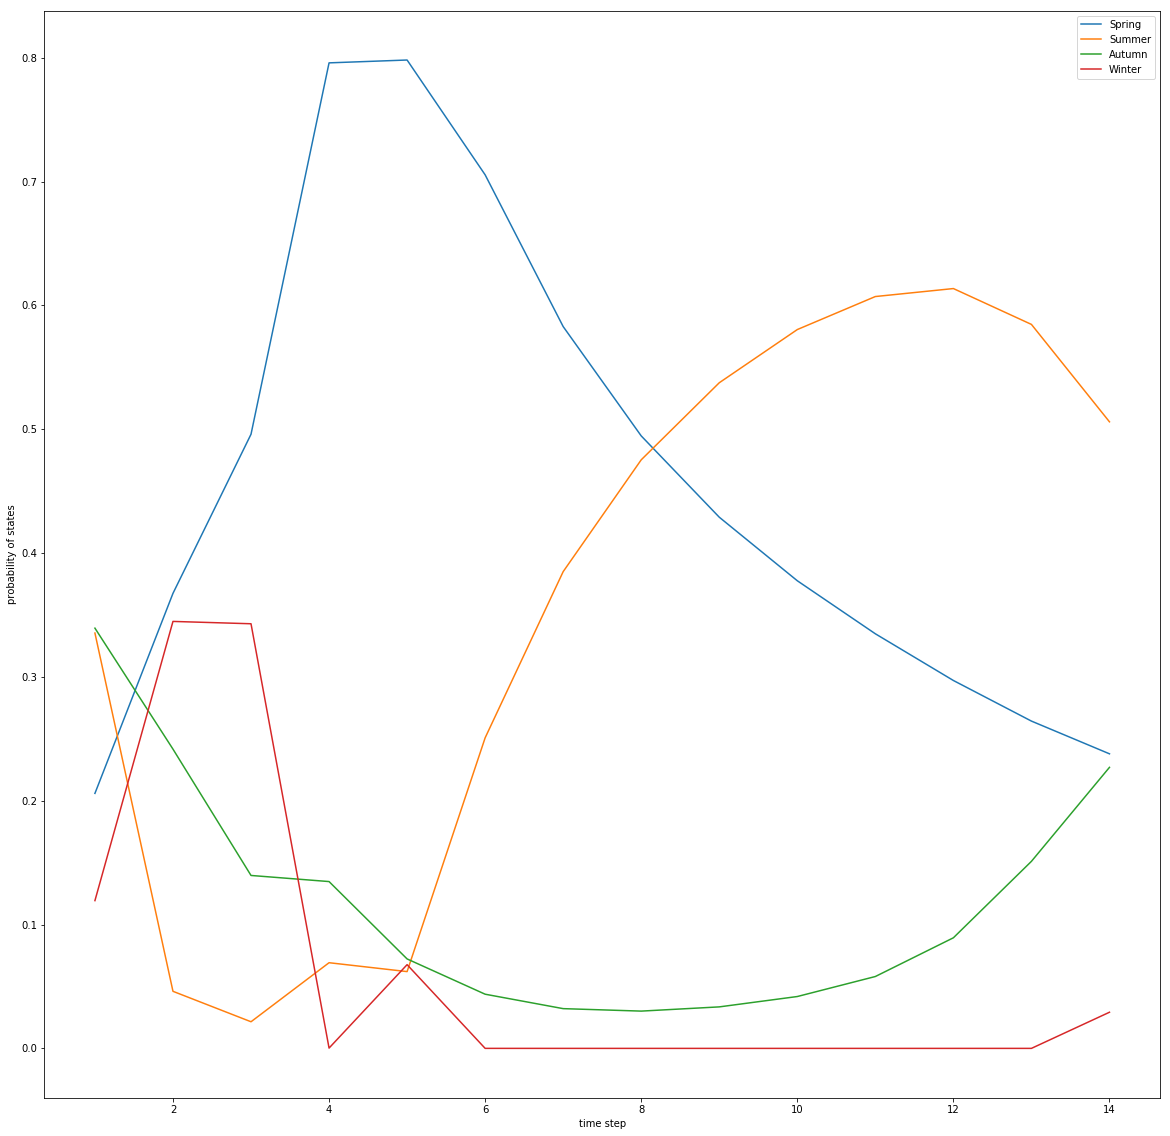

In [9]:
plt.plot(range(1,15),p_state[:,0], label = "Spring")
plt.plot(range(1,15),p_state[:,1], label = "Summer")
plt.plot(range(1,15),p_state[:,2], label = "Autumn")
plt.plot(range(1,15),p_state[:,3], label = "Winter")
plt.ylabel('probability of states')
plt.xlabel('time step')
plt.legend(loc=1, ncol=1)

**Part 2.** Determine the most likely sequence of states, $C_1,...,C_N$ that generated this observed sequence.

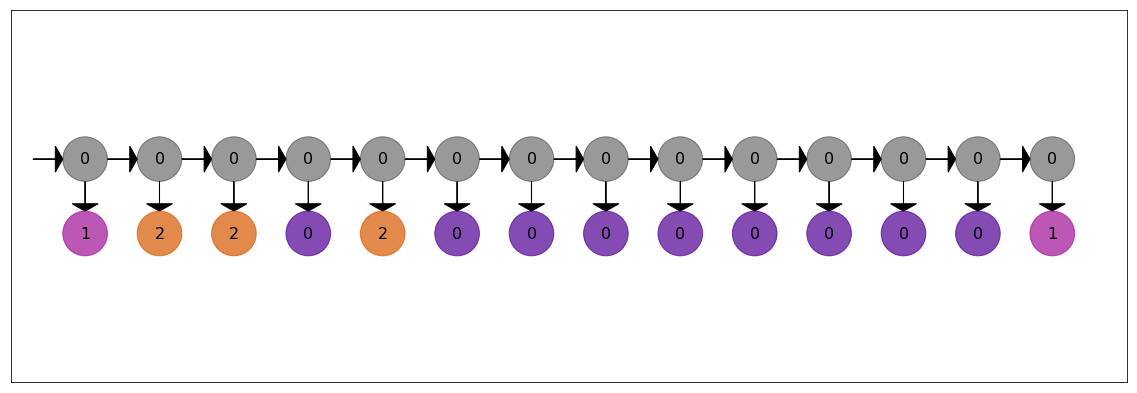

5.2529986053649408e-09

In [14]:
(log_prob,s_seq) =  dhmm.viterbi( Obs_seq[0:14] )
hmms.plot_hmm( s_seq, Obs_seq[0:14] )
np.exp( log_prob )

**Part 3.** What is the probability of the observed sequence, given the model parameters, i.e. $ p(O_1,O_2,...,O_{15} \mid T,E,P_0)$?

In [15]:
np.exp(dhmm.emission_estimate(Obs_seq[0:14]))


3.657490055451433e-07

**Part 4.** What is the probability of the observed sequence and most probable hidden states, given the model parameters, i.e. $ p((O_1,O_2,...,O_{15}), (C_1,C_2,...,C_{15}) \mid T,E,P_0)$?


In [17]:
np.exp(dhmm.estimate(s_seq, Obs_seq[0:14]))


5.2529986053649408e-09

**Part 5.** Now, let's see how well this model performs. Predict the output symbols (observations) for time
points $t = 16,...,20$ by carrying out the following steps for each time point $t$:


- Run the forward algorithm to estimate $p(C_{t} \mid O_{1},...,O_{t-1})$. 


In [26]:
p_state = np.zeros((20,4))

p_state[0,:] = np.dot(Pi,Trans) * Emiss[:,Obs_seq[0]]
p_state[0,:] = p_state[0,:] / sum(p_state[0,:])

for i in range(1,19):
    p_state[i,:] = np.dot(p_state[(i-1),:],Trans) * Emiss[:,Obs_seq[i]]
    p_state[i,:] = p_state[i,:] / sum(p_state[i,:])



- Compute $p(C_t)$ from $p(C_{t-1})$ using the transition matrix. Generate the output value $O_t$ by sampling a state $c_t$ from $p(C_t)$ and then from $p(O_t \mid C_t = c_t)$.

- Compare your predictions with the ground truth observations at time points $t = 15,...,20$. What's the percentage of these values that your model predicts correctly? Report the average and standard deviation over 100 runs.

In [67]:
est_obs = np.zeros((100,5))

for j in range(100):
    for i in range(1,6):
        p_ct = np.dot(p_state[(i+13),:],Trans)
        ct = np.random.choice([0,1,2,3],1,p = p_ct)
        p_ot = Emiss[ct,:]
        ot = np.random.choice([0,1,2],1,p = p_ot[0,:])
        est_obs[j,(i-1)] = ot

In [95]:
accuracy = np.zeros((1,100))
for i in range(100):
    accuracy[0][i] = np.sum(est_obs[i,:] == Obs_seq[14:19]) / 5

In [97]:
np.mean(accuracy), np.std(accuracy)

(0.39000000000000007, 0.23043437243605824)